<h1> Семинар 4. Итерационные методы решения линейных систем


<h3> Метод простой итерации

Дана система линейных алгебраических уравнений (СЛАУ):

$Ax = f$

Систему можно переписать в виде:

$x = (E -\tau A)x + \tau f$,

где $(E -\tau A)$ называется матрицей перехода.

Тогда (k+1)-е приближение ищем по формуле:

$x^{k+1} = (E -\tau A)x^{k} + \tau f$ или $x^{k+1} = Rx^{k} + F$

<h4> Задание 1

Дана система линейных алгербаических уравнений:

\begin{equation*}
\begin{cases}
10x_{1} - x_{2} = 8 \\
-x_{1} + 10x_{2} - x_{3}= 16  \\
-x_{2} + 10x_{3} - x_{4}= 24  \\
-x_{3} + 10x_{4} - x_{5}= 32 \\
-x_{4} + 10x_{5} = 46 \\
 \end{cases}
 \end{equation*}
 
 При начальном приближении $\vec{x^{0}} = (1,1,1,1,1)^{T}$

1.1 Решите СЛАУ методом простой итерации.

1.2 Постройте график зависимости погрешности решения от числа итераций.

1.3 Найдите оптимальное число итераций. 

1.4 Оцените число итераций необходимое для достижения точности $10^{-4}$. 

1.5 Решите СЛАУ с помощью numpy.linalg.solve и сравните полученный ответ с решением этой системы для оптимального числа итераций.

**1.1**

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
x = [1, 1, 1, 1, 1]
A = [[10, -1, 0, 0, 0], [-1, 10, -1, 0, 0], [0, -1, 10, -1, 0], [0,0,-1,10,-1], [0,0,0,-1,10]]
b = [8, 16, 24, 32, 46]
eps = []

lambda_min = min(np.linalg.eig(A)[0])
lambda_max = max(np.linalg.eig(A)[0])
tau = 2/(lambda_min + lambda_max)   #optimal tau

In [61]:
def makeI(n):
    # возвращает единичную матрицу размера n*n
    
    I = []
    for i in range(n):
        k = np.zeros(n)
        k[i] = 1
        I.append(k)
    return np.array(I)

E = makeI(5)
A = np.array(A)
R = (E - tau * A)
b = np.array(b)
F = tau * b

norm_e0 = np.linalg.norm(R@x + F - x)
q = np.linalg.norm(R)

In [62]:
for i in range(100):
    x = R@x + F
    eps.append(norm_e0 * q**i)

**1.2**

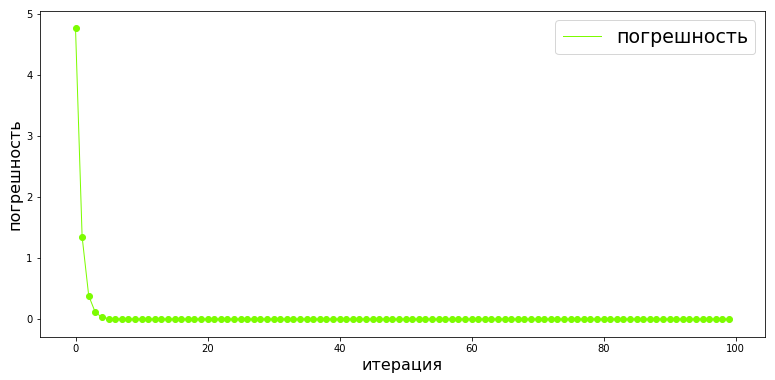

In [64]:
plt.figure(figsize=(13, 6))
n = np.arange(0, 100)
plt.plot(eps, color='lawngreen', label="погрешность", linewidth=1)
plt.scatter(n, eps, color='lawngreen')
plt.xlabel('итерация', fontsize=16)
plt.ylabel('погрешность', fontsize=16)
plt.legend(fontsize=19)
plt.show()

**1.3**

In [34]:
for i in range(100):
    x = R@x + F
    eps.append(norm_e0 * q**i)
    if (np.linalg.norm(eps) == 0): 
        print ('num of iterations: ', i)

**1.5**

In [36]:
x_theoretical = np.linalg.solve(A, b)
print(x_theoretical)

[1. 2. 3. 4. 5.]


**1.4**

In [45]:
need_eps = 0.0001

k = int((np.log(need_eps/ norm_e0)) / (np.log(q))) + 1

print("optimal iteration number: ", k)

optimal iteration number:  9


In [46]:
x=[1,1,1,1,1]
eps = []

for i in range(k):
    x = R@x + F
    eps.append(norm_e0 * q**i)

In [47]:
x

array([0.99999984, 1.99999968, 2.99999968, 3.99999967, 4.99999984])

<h3> Метод Якоби и метод Зейделя

A = L + D + U,

где L и U - нижняя и верхняя треугольные матрицы с нулевыми элементами на главной диагонали, D - диагональная матрица.
Решаем СЛАУ вида: Lu + Du + Uu = f

Итерационный процесс:

$x^{k+1} = Rx^{k} + F$

$R = –D^{–1}(L+U), F = D^{–1}f$ - метод Якоби

$R = –(L+D)^{–1}U, F = (L+D)^{–1}f$ - метод Зейделя

<h4> Задание 2

Дана система линейных алгербаических уравнений:

\begin{equation*}
\begin{cases}
-10x_{1} + x_{2} + x_{3} + x_{4} + x_{5}= 4 \\
x_{1} - 10x_{2} + x_{3}= -16  \\
x_{2} - 10x_{3} + x_{4}= -24  \\
x_{3} - 10x_{4} + x_{5}= -32 \\
x_{1} + x_{2} + x_{3} + x_{4} - 10x_{5} = -40 \\
 \end{cases}
 \end{equation*}
 
 При начальном приближении $\vec{x^{0}} = (1,1,1,1,1)^{T}$

1.1 Решите СЛАУ методом Якоби и Зейделя.

1.2 Исследуйте сходимость методов Якоби и Зейделя для данной системы.  

1.3 Используя точное решение СЛАУ $\vec{x^{*}} = (1,2,3,4,5)^{T}$ постройте график зависимости погрешности решения от числа итераций для методов Якоби и Зейделя и сравните их, округляя до трёх знаков после запятой.

1.4 Оцените число итераций необходимое для достижения точности $10^{-4}$. 

1.5 Решите СЛАУ с помощью numpy.linalg.solve и сравните полученный ответ с решением этой системы для числа итераций N = 10; 20; 100. 

**1.1** 


In [67]:
A = np.array([[-10,1,1,1,1], [1,-10,1,0,0], [0,1,-10,1,0],[0,0,1,-10,1],[1,1,1,1,-10]])
b = np.array([4,-16,-24,-32,-40])
x = np.array([1,1,1,1,1])

In [74]:
L = np.zeros((A.shape[0], A.shape[0]))
U = np.zeros((A.shape[0], A.shape[0]))
D = np.zeros((A.shape[0], A.shape[0]))

n = A.shape[0]

for i in range(n):
    for j in range(n):
        if (i<j):
            U[i, j] = A[i, j]
        if (i>j):
            L[i, j] = A[i, j]
        if (i==j):
            D[i,j] = A[i, j]

**Методы Якоби и Зейделя**

"ya" - для Якоби

"ze" - для Зейделя

In [82]:
R_ya = - np.linalg.inv(D) @ (L + U)
F_ya = np.linalg.inv(D) @ b

R_ze = - np.linalg.inv(L + D) @ U
F_ze = np.linalg.inv(L + D) @ b

x_ya = np.array([1,1,1,1,1])
x_ze = np.array([1,1,1,1,1])

In [83]:
for i in range(100):
    x_ya = R @ x_ya + F
    x_ze = R @ x_ze + F

In [84]:
print("Решение методом Якоби: ", x_ya )
print("Решение методом Зейделя: ", x_ze )
print("Решение с помощью стандартной библиотеки: ", np.linalg.solve(A, b))

Решение методом Якоби:  [1. 2. 3. 4. 5.]
Решение методом Зейделя:  [1. 2. 3. 4. 5.]
Решение с помощью стандартной библиотеки:  [1. 2. 3. 4. 5.]


**1.2**

Исследуем сходимость методов Якоби и Зейделя

Для этого запишем критерий сходимости для обоих методов (он один и тот же)

Нужная нам матрица из критерия будет иметь вид: $L + U + D \cdot lambda$

In [87]:
A_lambded = np.copy(A)

# Запишем детермимант матрицы, которая равна матрице А, но все элементы на диагонали домножены на lambda
# для нашей матрицы это:

def determ(lambd):
    return np.linalg.det(L+U+lambd*D)

In [101]:
from scipy import optimize

scipy.optimize.fsolve(determ, 0)

array([0.])

Для данной системы оба метода сходятся.

**1.3**

In [106]:
x_ya = np.array([1,1,1,1,1])
x_ze = np.array([1,1,1,1,1])
x_real = np.array(np.linalg.solve(A, b))
eps_ya = []
eps_ze = []

for i in range(10):
    x_ya = R @ x_ya + F
    x_ze = R @ x_ze + F
    eps_ya.append(round(np.linalg.norm(x_ya - x_real ), 3))
    eps_ze.append(round(np.linalg.norm(x_ze - x_real ), 3))

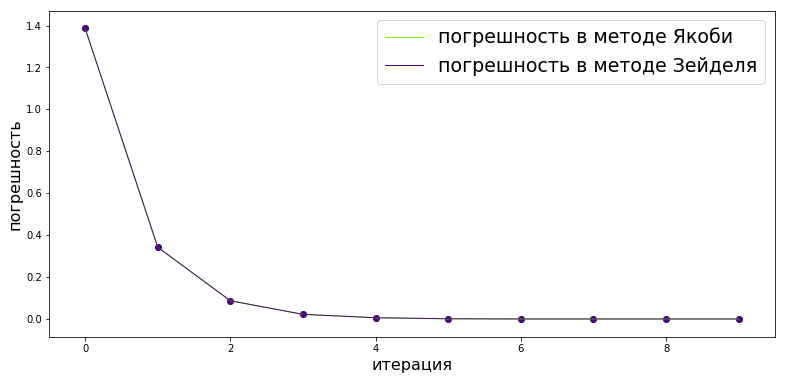

In [107]:
plt.figure(figsize=(13, 6))
nn = np.arange(0, 10)
plt.plot(eps_ya, color='lawngreen', label="погрешность в методе Якоби", linewidth=1)
plt.plot(eps_ze, color='indigo', label="погрешность в методе Зейделя", linewidth=1)
plt.scatter(nn, eps_ya, color='lawngreen')
plt.scatter(nn, eps_ze, color='indigo')
plt.xlabel('итерация', fontsize=16)
plt.ylabel('погрешность', fontsize=16)
plt.legend(fontsize=19)
plt.show()

Как можно заметить, графики совпадают, то есть с точностью до 3 знаков после запятой погрешности будут у методов одинаковые. 

**1.4**

Оцените число итераций необходимое для достижения точности.

Здесь рассматривалось, чтобы между текущим и реальным решениями была разница не более, чем эта точность. Можно заменить значение в строке функции и посмотреть при разнице двух последующих решений.

In [110]:
x_ya = np.array([1,1,1,1,1])
x_ze = np.array([1,1,1,1,1])
x_real = np.array(np.linalg.solve(A, b))
eps_ya = []
eps_ze = []
needed_eps = 0.0001
ya = True
ze = True

for i in range(100):
    x_ya = R @ x_ya + F
    x_ze = R @ x_ze + F
    if (ya):
        if (np.linalg.norm(x_ya - x_real ) < 0.0001):
            print("число итераций, нужное для метода Якоби:", i+1)   
            # i+1, так как итерации считаем с нулевой
            ya = False   # это значит, что уже достигли нужного числа итераций и больше не считаем
    if(ze):
        if (np.linalg.norm(x_ze - x_real ) < 0.0001):
            print("число итераций, нужное для метода Зейделя:", i+1)
            ze = False

число итераций, нужное для метода Якоби: 8
число итераций, нужное для метода Зейделя: 8


**1.5**

Для 10 итераций:

In [113]:
x_real = np.linalg.solve(A, b)
x_ya_10 = np.array([1,1,1,1,1])
x_ze_10 = np.array([1,1,1,1,1])

for i in range(10):
    x_ya_10 = R @ x_ya_10 + F
    x_ze_10 = R @ x_ze_10 + F
    
print("Реальное решение: ", x_real)    
print("Якоби, 10 итераций: ", x_ya_10)
print("Зейдель, 10 итераций: ", x_ze_10)

Реальное решение:  [1. 2. 3. 4. 5.]
Якоби, 10 итераций:  [0.99999626 1.9999979  2.99999836 3.9999979  4.99999626]
Зейдель, 10 итераций:  [0.99999626 1.9999979  2.99999836 3.9999979  4.99999626]


Как мы видим, решение верное мы уже почти получили

Для 20 итераций:

In [115]:
x_real = np.linalg.solve(A, b)
x_ya_20 = np.array([1,1,1,1,1])
x_ze_20 = np.array([1,1,1,1,1])

for i in range(20):
    x_ya_20 = R @ x_ya_20 + F
    x_ze_20 = R @ x_ze_20 + F
    
print("Реальное решение: ", x_real)    
print("Якоби, 20 итераций: ", x_ya_20)
print("Зейдель, 20 итераций: ", x_ze_20)

Реальное решение:  [1. 2. 3. 4. 5.]
Якоби, 20 итераций:  [1. 2. 3. 4. 5.]
Зейдель, 20 итераций:  [1. 2. 3. 4. 5.]


Теперь у нас уже есть точное решение, совпадающее с тем, что было получено при помощи библиотечной функции.

Для 100 итераций:

In [116]:
x_real = np.linalg.solve(A, b)
x_ya_100 = np.array([1,1,1,1,1])
x_ze_100 = np.array([1,1,1,1,1])

for i in range(100):
    x_ya_100 = R @ x_ya_100 + F
    x_ze_100 = R @ x_ze_100 + F
    
print("Реальное решение: ", x_real)    
print("Якоби, 100 итераций: ", x_ya_100)
print("Зейдель, 100 итераций: ", x_ze_100)

Реальное решение:  [1. 2. 3. 4. 5.]
Якоби, 100 итераций:  [1. 2. 3. 4. 5.]
Зейдель, 100 итераций:  [1. 2. 3. 4. 5.]


И снова, мы получили нужное решение.

<h3> Метод наискорейшего спуска (метод градиентного спуска)

$x^{k+1} = x^{k} - \alpha f'(x^{k})$

<h4> Задание 3

3.1 Решите задачу минимизации квадратичной функции $f(x_{1},x_{2}) = x_{1}^{2} + 2x_{2}^{2} - 4x_{1} - 4x_{2}$ с помощью метода наискорейшего спуска.

3.2 Постройте траекторию спуска (т. е. график в координатах ($x_{1},x_{2}$)).

3.3 Постройте зависимость значения функции $f(x_{1},x_{2})$ от номера итерации (число итераций $\approx 100$).

**3.1**

Решаем задачу минимизации.

In [136]:
# сама функция
def f(x, y):
    res = x **2 + 2* y**2 - 4*x - 4* y
    return res

# градиент
def grad_f(x, y):
    f_x = 2*x - 4
    f_y = 4*y - 4
    return f_x, f_y

# шаг можно брать постоянный или переменный, возьмем постоянный
alpha = 0.03

iteration = 150
f_vals = []
x_vals = []
y_vals=[]

#начальные значения возьмем на всякий случай ненулевые (и не как решения системы)
x = 1
y = 5
x_prev = 100
y_prev = 100
eps = 0.0001

while(np.linalg.norm(np.array([x, y]) - np.array([x_prev, y_prev])) > eps):
    x_vals.append(x)
    y_vals.append(y)
    f_vals.append(f(x, y))
    x_prev = x
    y_prev = y
    x = x - alpha*grad_f(x, y)[0]
    y = y - alpha*grad_f(x, y)[1]
    

In [137]:
print("x = ", x)
print("y = ", y)
print("f_min = ", f(x,  y))

x =  1.9984919191403843
y =  1.0000059257123672
f_min =  -5.999997725621893


До этого было записано решение с условием остановки, выраженным через разность между последующими решениями.

Можно записать и в виде числа итераций:

In [139]:
iteration = 110
f_vals = []
x_vals = []
y_vals=[]

#начальные значения возьмем на всякий случай ненулевые (и не как решения системы)
x = 1
y = 5
eps = 0.0001

for i in range(iteration):
    x_vals.append(x)
    y_vals.append(y)
    f_vals.append(f(x, y))
    x = x - alpha*grad_f(x, y)[0]
    y = y - alpha*grad_f(x, y)[1]

In [140]:
print("x = ", x)
print("y = ", y)
print("f_min = ", f(x,  y))

x =  1.9988932133910238
y =  1.000003127187546
f_min =  -5.999998775003843


Как можно заметить, решение почти такое же, точность довольно хорошая. Таким образом, можно предположить, что реальное оптимальное решение - это (2, 1) и минимальное значение функции это -6

**1.2**

Построим траекторию спуска

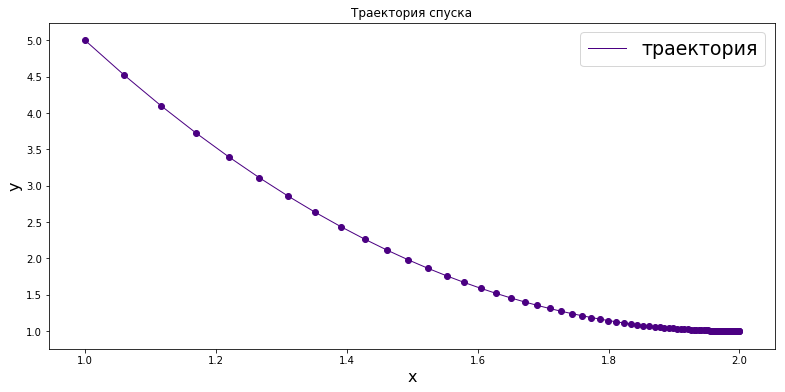

In [143]:
plt.figure(figsize=(13, 6))
plt.plot(x_vals, y_vals, color='indigo', label="траектория", linewidth=1)
plt.scatter(x_vals, y_vals, color='indigo')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title("Траектория спуска")
plt.legend(fontsize=19)
plt.show()

**1.3**

Построим график зависимости значения функции от номера итерации.

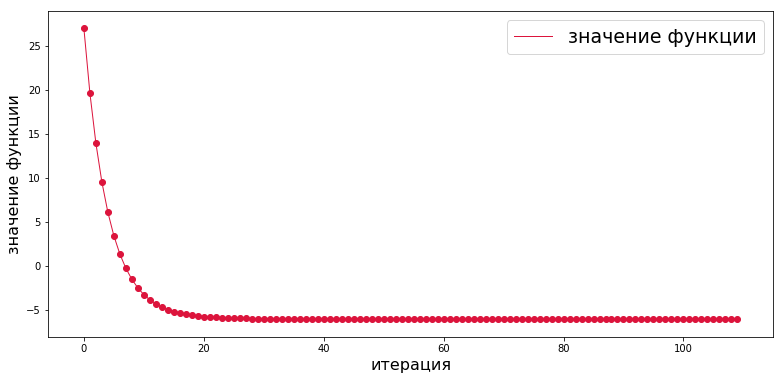

In [144]:
plt.figure(figsize=(13, 6))
ni = np.arange(0, iteration)
plt.plot(f_vals, color='crimson', label="значение функции", linewidth=1)
plt.scatter(ni, f_vals, color='crimson')
plt.xlabel('итерация', fontsize=16)
plt.ylabel('значение функции', fontsize=16)
plt.legend(fontsize=19)
plt.show()
